In [2]:
library(statnet)
library(data.table)
library(igraph)
library(Rglpk)
library(btergm)
library(texreg)
data(florentine)


In [4]:
path <- "../output/co_citation_graphs/Economics.edgelist"
edges <- fread(path, sep=" ", select = c("V1","V2"), header=FALSE)
edge_matrix <- as.matrix(edges)
n <- network(
    edge_matrix,
    directed=F,
    hyper=F,
    loops=F,
    multiple=F,
    bipartite=F
)
n

 Network attributes:
  vertices = 73 
  directed = FALSE 
  hyper = FALSE 
  loops = FALSE 
  multiple = FALSE 
  bipartite = FALSE 
  total edges= 100 
    missing edges= 0 
    non-missing edges= 100 

 Vertex attribute names: 
    vertex.names 

No edge attributes

In [6]:

co_occurence.00 = ergm(
    n ~ 
    edges

    # Triadic closure 
    # Number of triads in the network and compares them to the number of triads in random networks
    # + triangle

    # Count ties for which adjacent nodes have at least one partner in common
    # + transitiveties

    # checks whether the number of nodes with a specific degree is more or less likely than compared to a random network
    # + degree(0:3)

    # checks whether the number of nodes with a specific kstar is more or less likely than compared to a random network
    # + kstar(0:3)

    + gwesp(1,fixed=FALSE)

    # considered a more stable term. The gw in the gwdegree() stands for ‘geometrically weighted’ in the estimation of the degree distribution. It measures a node’s tendency to have multiple outgoing or incoming ties. The weights its referring to are applied to the increasing number of connections each node has. As such, one of the parameters (the α value) of the term is the decay in weight: Values close to 0 give more relative weight to smaller degree-counts.
    # A good way of determining which α value we should use is by looking at the Bayesian Information Criteria (BIC) from the resulting regressions. Note: remember that smaller BIC-values indicates a better model fit.
    # + gwdegree(decay = 1, fixed = TRUE)

    # Edgewise shared partner statistics. This set of terms measure how many connections two nodes have in common.
    # The term is more a distribution than a fixed number. To get this number we have to:
        # For every edge between two nodes in a network, count how many two paths are there between one vertix of the edge to the other. This is akin to counting how many nodes are one step away from both vertices of the edge.
        # Count how many have 0 nodes in common
        # How many have 1 in common
        # How many have 2 in common
    # + esp(5)

    ,
    verbose=FALSE, 
    constraints = ~bd (maxout = 19),
    control = control.ergm(
        seed = 1,
        # samplesize = 10,
        MCMLE.maxit = 100,
        # parallel = 2,
        # burnin = 100,
        CD.maxit = 10,
    )
)

# The inclusion of several out-degree measures cancels out the statistical significance of the edges term because of multicollinearity - the two measures reflect the same information in the network.

summary(co_occurence.00)

Warning message:
"In term 'gwesp' in package 'ergm': Decay parameter 'decay' passed with 'fixed=FALSE'. 'decay' will be ignored. To specify an initial value for 'decay', use the 'control.ergm()' parameter 'init='."
Starting contrastive divergence estimation via CD-MCMLE:

Iteration 1 of at most 10:

Convergence test P-value:1.2e-157

The log-likelihood improved by 2.071.

Iteration 2 of at most 10:

Convergence test P-value:2.2e-146

The log-likelihood improved by 1.841.

Iteration 3 of at most 10:

Convergence test P-value:5.5e-83

The log-likelihood improved by 0.9032.

Iteration 4 of at most 10:

Convergence test P-value:4e-24

The log-likelihood improved by 0.1686.

Iteration 5 of at most 10:

Convergence test P-value:1.6e-10

The log-likelihood improved by 0.0662.

Iteration 6 of at most 10:

Convergence test P-value:1.7e-01

The log-likelihood improved by 0.006443.

Iteration 7 of at most 10:

Convergence test P-value:7.2e-01

Convergence detected. Stopping.

The log-likelihood i


Starting GOF assessment on a single computing core....


No 'target' network(s) provided. Using networks on the left-hand side of the model formula as observed networks.


Simulating 50 networks from the following formula:
 n ~ edges + transitiveties + degree(0:3) + kstar(0:3) + gwdegree(decay = 1, fixed = TRUE) + esp(5) 


One network from which simulations are drawn was provided.


Processing statistic: Dyad-wise shared partners

Processing statistic: Edge-wise shared partners

Processing statistic: Degree

Processing statistic: Indegree

Processing statistic: Geodesic distances

Processing statistic: Tie prediction

<sparse>[ <logic> ]: .M.sub.i.logical() maybe inefficient

<sparse>[ <logic> ]: .M.sub.i.logical() maybe inefficient

Processing statistic: Modularity (walktrap)



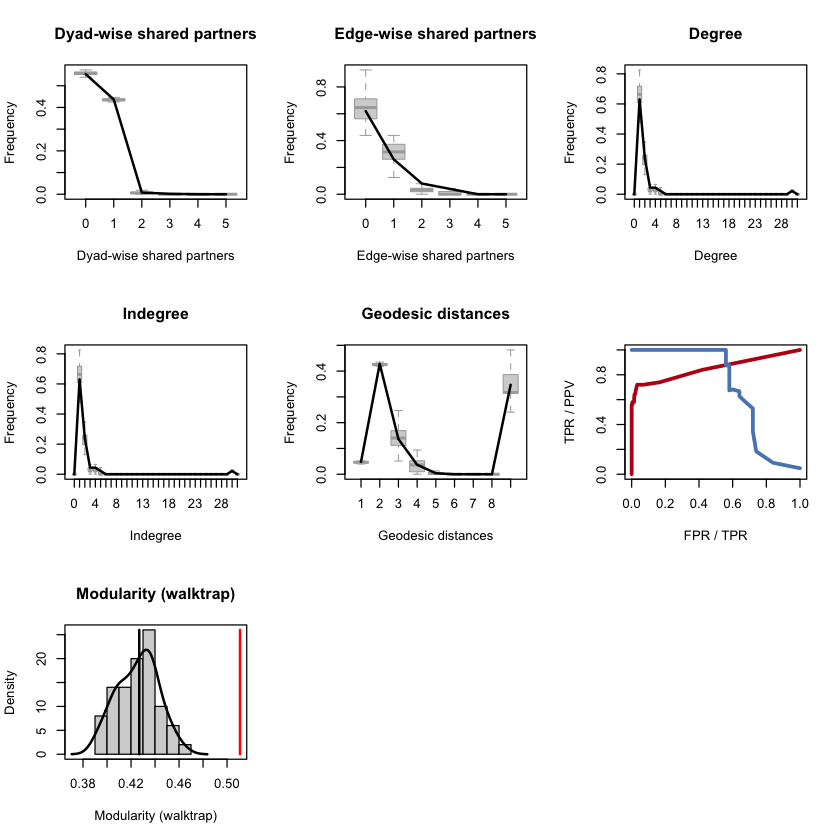

In [10]:
gof.co_occurence.00 <- btergm::gof(co_occurence.00, nsim = 50)
plot(gof.co_occurence.00)


In [11]:
gof.co_occurence.00$Degree$stats

,obs,sim: mean,median,min,max,Pr(>z)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,0,0.00,0.0,0,0,1.0000000
1,29,30.58,30.5,22,38,0.7795040
2,11,10.58,11.0,4,16,0.9406752
3,2,1.50,1.0,0,4,0.9294025
4,2,1.62,1.0,0,5,0.9463162
5,1,0.72,0.0,0,4,0.9604299
6,0,0.00,0.0,0,0,1.0000000
7,0,0.00,0.0,0,0,1.0000000
8,0,0.00,0.0,0,0,1.0000000


In [202]:
summary(co_occurence.00)

Call:
ergm(formula = n ~ edges + transitiveties + degree(0:3) + kstar(0:3) + 
    gwdegree(decay = 1, fixed = TRUE) + esp(d), verbose = FALSE)

Monte Carlo Maximum Likelihood Results:

                 Estimate Std. Error MCMC % z value Pr(>|z|)    
edges          -8.382e+02         NA     NA      NA       NA    
transitiveties  1.111e+00         NA     NA      NA       NA    
degree0              -Inf  0.000e+00      0    -Inf   <1e-04 ***
degree1         5.771e+02         NA     NA      NA       NA    
degree2         2.129e+02         NA     NA      NA       NA    
degree3         5.087e+01         NA     NA      NA       NA    
kstar0               -Inf  0.000e+00      0    -Inf   <1e-04 ***
kstar1         -5.997e-03         NA     NA      NA       NA    
kstar2          6.444e+01         NA     NA      NA       NA    
kstar3         -3.516e+00         NA     NA      NA       NA    
gwdeg.fixed.1   1.132e+03         NA     NA      NA       NA    
esp0.5          5.941e-01         N

In [210]:
texreg(list(co_occurence.00), 
       file = './model.tex'
       # custom.model.names = c('endogenous', 'covariates', 'combo'),
       # single.row = TRUE, # adds SE on the same line as coefficients
       # caption = 'Comparison of ERG models', 
       # fontsize = 'footnotesize'
       )

The table was written to the file './model.tex'.




In [160]:

co_occurence.00 = ergm(
    n ~ 
    edges
    # Count ties for which adjacent nodes have at least one partner in common
    # + transitiveties

    # checks whether the number of nodes with a specific degree is more or less likely than compared to a random network
    + degree(0:10)

    # + kstar(1:2)
    ,
    verbose=FALSE
)
summary(co_occurence.00)

Observed statistic(s) degree0, degree2, degree3, degree4, degree5, and degree8 are at their smallest attainable values. Their coefficients will be fixed at -Inf.

Starting maximum pseudolikelihood estimation (MPLE):

Evaluating the predictor and response matrix.

Warning message in mple.existence(pl):
"The MPLE does not exist!"
Maximizing the pseudolikelihood.

Warning message in ergm.mple(nw, fd, m, MPLEtype = MPLEtype, init = init, control = control, :
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Finished MPLE.

Warning message:
"Model statistics 'degree9' and 'degree10' are linear combinations of some set of preceding statistics at the current stage of the estimation. This may indicate that the model is nonidentifiable."
Starting Monte Carlo maximum likelihood estimation (MCMLE):

Iteration 1 of at most 60:

Model statistics 'degree1' are not varying. This may indicate that the observed data occupies an extreme point in the sample space or that the estimation has reac

Call:
ergm(formula = n ~ edges + degree(0:10), verbose = FALSE)

Monte Carlo Maximum Likelihood Results:

         Estimate Std. Error MCMC % z value Pr(>|z|)    
edges    56.27720         NA     NA      NA       NA    
degree0      -Inf    0.00000      0    -Inf   <1e-04 ***
degree1   0.00000         NA     NA      NA       NA    
degree2      -Inf    0.00000      0    -Inf   <1e-04 ***
degree3      -Inf    0.00000      0    -Inf   <1e-04 ***
degree4      -Inf    0.00000      0    -Inf   <1e-04 ***
degree5      -Inf    0.00000      0    -Inf   <1e-04 ***
degree6  36.00239         NA     NA      NA       NA    
degree7   0.04821         NA     NA      NA       NA    
degree8      -Inf    0.00000      0    -Inf   <1e-04 ***
degree9  17.42211         NA     NA      NA       NA    
degree10  0.04821         NA     NA      NA       NA    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


  degree0 degree2 degree3 degree4 degree5 degree8 

In [137]:
co_occurence.00 = ergm.tapered(
    n ~ 
    edges
    # Count ties for which adjacent nodes have at least one partner in common
    + transitiveties

    + kstar(2:5)
    
    ,
    verbose=FALSE
)
summary(co_occurence.00)

ERROR: Error in ergm.tapered(n ~ edges + transitiveties, verbose = FALSE): could not find function "ergm.tapered"


In [149]:
d <- 0.5
decay <- 0.1

In [157]:
co_occurence.00 = ergm(
    n ~ 
    edges
    + triangles
    + transitiveties
    + gwesp(decay=1, fixed=TRUE)
    + opentriad
    + esp(d)
    + gwdsp(fixed=FALSE, cutoff=30)
    + gwesp(fixed=FALSE, cutoff=30)
    + gwnsp(fixed=FALSE, cutoff=30)
    + nsp(d)
    + dsp(d)
)
summary(co_occurence.00)

Starting maximum pseudolikelihood estimation (MPLE):

Evaluating the predictor and response matrix.

Maximizing the pseudolikelihood.

Finished MPLE.

Warning message:
"Model statistics 'gwesp.fixed.1', 'esp0.5', 'gwesp', 'gwesp.decay', 'gwnsp', 'gwnsp.decay', 'nsp0.5', and 'dsp0.5' are linear combinations of some set of preceding statistics at the current stage of the estimation. This may indicate that the model is nonidentifiable."
Starting Monte Carlo maximum likelihood estimation (MCMLE):

Iteration 1 of at most 60:



In [ ]:
# + transitivity
# + odegree(1)
# + kstar(3)
# + gwesp(decay=1, fixed=TRUE)
# + tripercent
# + ttriple
# istar(1:3)
# + ostar(1:3)
# + mutual
# + istar(3, attr=NULL, levels=NULL)
# + balance
# + ctriad
# + isolates
# + nodematch('group')
# + asymmetric(attr=NULL, diff=FALSE, keep=NULL, levels=NULL)
# + ctriple(attr=NULL, diff=FALSE, levels=NULL)
# + ddsp(d, type=“OTP”)
# + desp(d, type=“OTP”)
# + gwidegree(decay = 1, fixed = TRUE))
# + dgwdsp(decay, fixed=FALSE, cutoff=30, type=“OTP”)
# + dgwesp(decay, fixed=FALSE, cutoff=30, type=“OTP”)
# + dgwnsp(decay, fixed=FALSE, cutoff=30, type=“OTP”)
# + dnsp(d, type=“OTP”)
# + dsp(d)
# + 
# + 

# UNDIRECTED

# + opentriad
# + triangle(attr, diff, levels)
# + 
# + 

# DIRECTED

# + receiver(base, nodes)
# + receiver(base, nodes, form)
# + intransitive
# + transitive

In [53]:
path <- "../output/co_occurence_graphs/Economics.edgelist"
edges <- fread(path, sep=" ", select = c("V1","V2"), header=FALSE)
edge_matrix <- as.matrix(edges)
mesa <- network(
    edge_matrix,
    directed=F,
    hyper=F,
    loops=F,
    multiple=F,
    bipartite=F
)
mesa


 Network attributes:
  vertices = 48 
  directed = FALSE 
  hyper = FALSE 
  loops = FALSE 
  multiple = FALSE 
  bipartite = FALSE 
  total edges= 100 
    missing edges= 0 
    non-missing edges= 100 

 Vertex attribute names: 
    vertex.names 

No edge attributes

In [ ]:
ergm(flomarriage~edges)%>%summary()
ergm(flomarriage~edges+triangles)%>%summary()
ergm(flomarriage~edges+kstar(3))%>%summary()

In [28]:
data(faux.mesa.high)
mesa <- faux.mesa.high

In [29]:
set.seed(1)
mesa

 Network attributes:
  vertices = 205 
  directed = FALSE 
  hyper = FALSE 
  loops = FALSE 
  multiple = FALSE 
  bipartite = FALSE 
  total edges= 203 
    missing edges= 0 
    non-missing edges= 203 

 Vertex attribute names: 
    Grade Race Sex 

No edge attributes

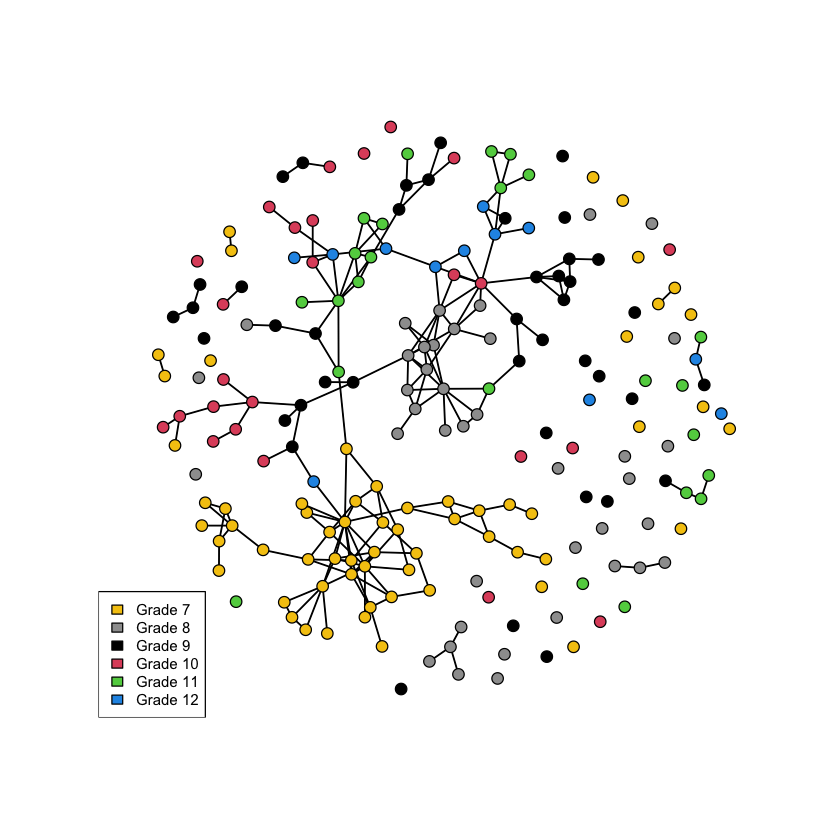

In [30]:
par(mfrow=c(1,1)) # Back to 1-panel plots
plot(mesa, vertex.col='Grade')
legend('bottomleft',fill=7:12,
legend=paste('Grade',7:12),cex=0.75)

In [54]:
fauxmodel.01 <- ergm(
    mesa
    ~
    # triangles
    edges
    + 
    transitiveties
    +
    kstar(3)
    # triangles
    # +
    # nodefactor('Grade')
    # +
    # nodematch('Grade', diff=T)
    # +
    # nodefactor('Race')
    # +
    # nodematch('Race', diff=T)
)

Starting maximum pseudolikelihood estimation (MPLE):

Evaluating the predictor and response matrix.

Maximizing the pseudolikelihood.

Finished MPLE.

Starting Monte Carlo maximum likelihood estimation (MCMLE):

Iteration 1 of at most 60:

Optimizing with step length 0.4642.

The log-likelihood improved by 3.0704.

Estimating equations are not within tolerance region.

Iteration 2 of at most 60:

Optimizing with step length 0.6667.

The log-likelihood improved by 2.1125.

Estimating equations are not within tolerance region.

Iteration 3 of at most 60:

Optimizing with step length 1.0000.

The log-likelihood improved by 1.1223.

Estimating equations are not within tolerance region.

Iteration 4 of at most 60:

Optimizing with step length 1.0000.

The log-likelihood improved by 0.0893.

Convergence test p-value: 0.2286. 
Not converged with 99% confidence; increasing sample size.

Iteration 5 of at most 60:

Optimizing with step length 1.0000.

The log-likelihood improved by 0.0484.

Con

In [55]:
summary(fauxmodel.01)

Call:
ergm(formula = mesa ~ edges + transitiveties)

Monte Carlo Maximum Likelihood Results:

               Estimate Std. Error MCMC % z value Pr(>|z|)    
edges           -3.6177     0.2394      0 -15.111   <1e-04 ***
transitiveties   1.2589     0.2219      0   5.674   <1e-04 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

     Null Deviance: 1564  on 1128  degrees of freedom
 Residual Deviance:  624  on 1126  degrees of freedom
 
AIC: 628  BIC: 638.1  (Smaller is better. MC Std. Err. = 0.802)

In [13]:
set.seed(123) # The plot.network function uses random values
data(florentine) # loads flomarriage and flobusiness data
flomarriage # Equivalent to print.network(flomarriage): Examine properties

 Network attributes:
  vertices = 16 
  directed = FALSE 
  hyper = FALSE 
  loops = FALSE 
  multiple = FALSE 
  bipartite = FALSE 
  total edges= 20 
    missing edges= 0 
    non-missing edges= 20 

 Vertex attribute names: 
    priorates totalties vertex.names wealth 

No edge attributes

[1]  10  36  55  44  20  32   8  42 103  48  49   3  27  10 146  48

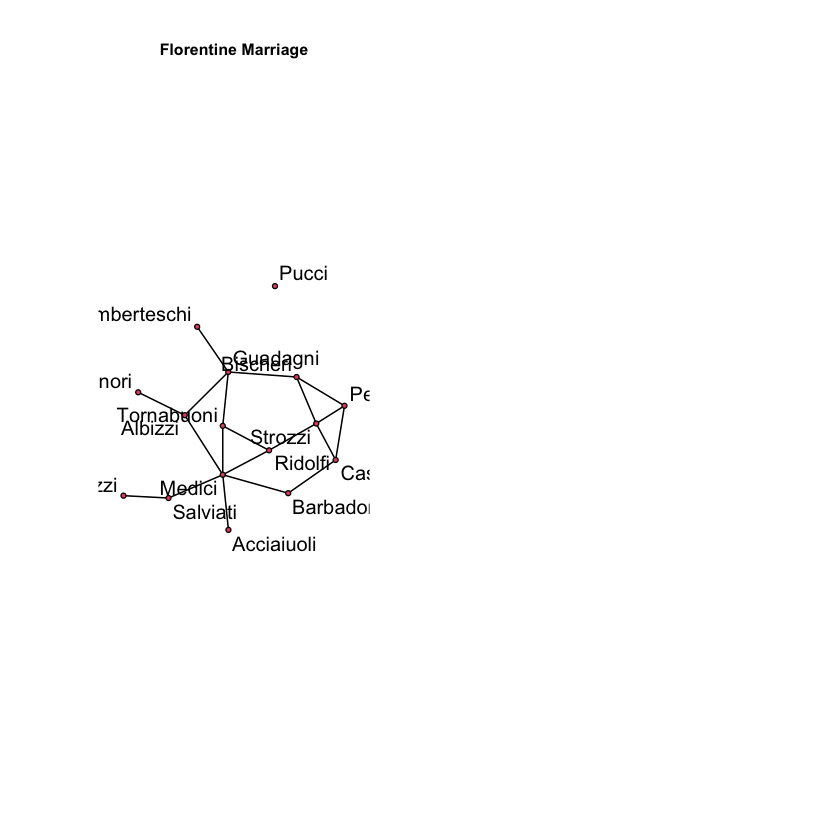

In [14]:
par(mfrow=c(1,2)) # Set up a 2-column (and 1-row) plot area
plot(flomarriage,
main="Florentine Marriage",
cex.main=0.8,
label = network.vertex.names(flomarriage)) # Equivalent to plot.network(...)
wealth <- flomarriage %v% 'wealth' # %v% references vertex attributes
wealth

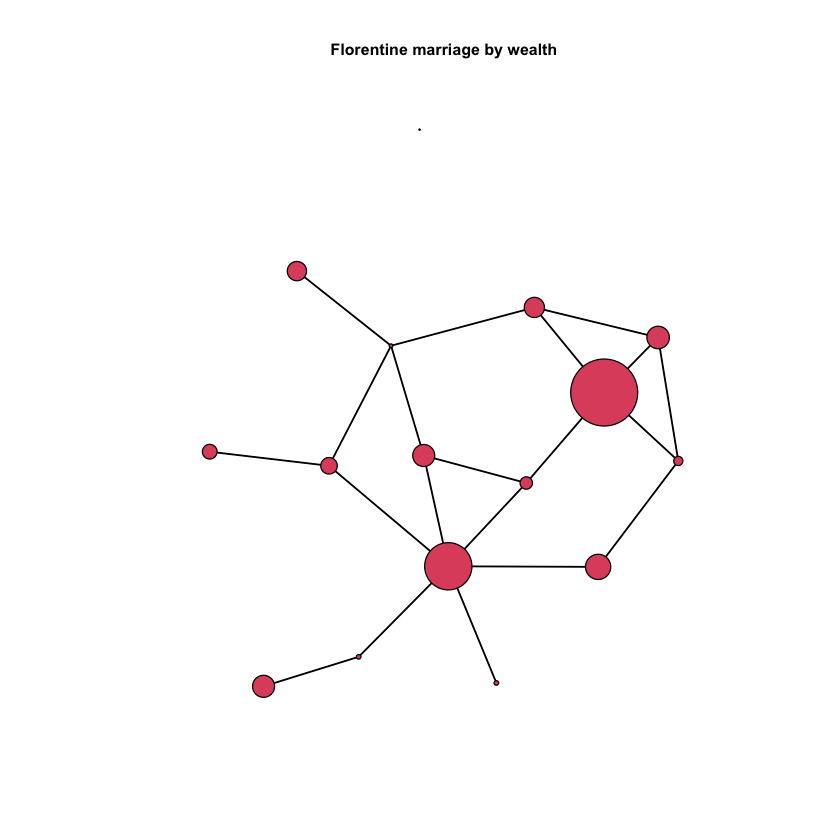

In [15]:
plot(flomarriage,
vertex.cex=wealth/25, # Make vertex size proportional to wealth attribute
main="Florentine marriage by wealth", cex.main=0.8)

In [19]:
summary(flomarriage ~ edges) # Calculate the edges statistic for this network

edges 
   20

In [20]:
flomodel.01 <- ergm(flomarriage ~ edges + triangle) # Estimate the model

Starting maximum pseudolikelihood estimation (MPLE):

Evaluating the predictor and response matrix.

Maximizing the pseudolikelihood.

Finished MPLE.

Starting Monte Carlo maximum likelihood estimation (MCMLE):

Iteration 1 of at most 60:

Optimizing with step length 1.0000.

The log-likelihood improved by 0.0021.

Convergence test p-value: < 0.0001. 
Converged with 99% confidence.

Finished MCMLE.

Evaluating log-likelihood at the estimate. 
Fitting the dyad-independent submodel...

Bridging between the dyad-independent submodel and the full model...

Setting up bridge sampling...

Using 16 bridges: 
1 
2 
3 
4 
5 
6 
7 
8 
9 
10 
11 
12 
13 
14 
15 
16 
.

Bridging finished.

This model was fit using MCMC.  To examine model diagnostics and check
for degeneracy, use the mcmc.diagnostics() function.



In [21]:
summary(flomodel.01) # Look at the fitted model object

Call:
ergm(formula = flomarriage ~ edges + triangle)

Monte Carlo Maximum Likelihood Results:

         Estimate Std. Error MCMC % z value Pr(>|z|)    
edges     -1.6834     0.3909      0  -4.306   <1e-04 ***
triangle   0.1803     0.6280      0   0.287    0.774    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

     Null Deviance: 166.4  on 120  degrees of freedom
 Residual Deviance: 108.1  on 118  degrees of freedom
 
AIC: 112.1  BIC: 117.6  (Smaller is better. MC Std. Err. = 0.0106)

In [5]:
data("florentine")
flomodel.01 <- ergm(flomarriage ~ edges, verbose=F)
summary(flomodel.01)

Starting maximum pseudolikelihood estimation (MPLE):

Evaluating the predictor and response matrix.

Maximizing the pseudolikelihood.

Finished MPLE.

Stopping at the initial estimate.

Evaluating log-likelihood at the estimate. 




Call:
ergm(formula = flomarriage ~ edges, verbose = F)

Maximum Likelihood Results:

      Estimate Std. Error MCMC % z value Pr(>|z|)    
edges  -1.6094     0.2449      0  -6.571   <1e-04 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

     Null Deviance: 166.4  on 120  degrees of freedom
 Residual Deviance: 108.1  on 119  degrees of freedom
 
AIC: 110.1  BIC: 112.9  (Smaller is better. MC Std. Err. = 0)

In [6]:
flomodel.02 <- ergm(flomarriage ~ edges + triangle, verbose=F)
summary(flomodel.02)

Starting maximum pseudolikelihood estimation (MPLE):

Evaluating the predictor and response matrix.

Maximizing the pseudolikelihood.

Finished MPLE.

Starting Monte Carlo maximum likelihood estimation (MCMLE):

Iteration 1 of at most 60:

Warning message:
"'glpk' selected as the solver, but package 'Rglpk' is not available; falling back to 'lpSolveAPI'. This should be fine unless the sample size and/or the number of parameters is very big."
Optimizing with step length 1.0000.

The log-likelihood improved by 0.0022.

Convergence test p-value: < 0.0001. 
Converged with 99% confidence.

Finished MCMLE.

Evaluating log-likelihood at the estimate. 
Fitting the dyad-independent submodel...

Bridging between the dyad-independent submodel and the full model...

Setting up bridge sampling...

Using 16 bridges: 
1 
2 
3 
4 
5 
6 
7 
8 
9 
10 
11 
12 
13 
14 
15 
16 
.

Bridging finished.

This model was fit using MCMC.  To examine model diagnostics and check
for degeneracy, use the mcmc.diagnos

Call:
ergm(formula = flomarriage ~ edges + triangle, verbose = F)

Monte Carlo Maximum Likelihood Results:

         Estimate Std. Error MCMC % z value Pr(>|z|)    
edges     -1.7009     0.3446      0  -4.935   <1e-04 ***
triangle   0.1965     0.5352      0   0.367    0.714    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

     Null Deviance: 166.4  on 120  degrees of freedom
 Residual Deviance: 108.1  on 118  degrees of freedom
 
AIC: 112.1  BIC: 117.7  (Smaller is better. MC Std. Err. = 0.01148)

In [7]:
flomodel.02 <- ergm(flomarriage ~ edges + triangle + kstar(1:3) + degree(0:5))
summary(flomodel.02)

Observed statistic(s) degree5 are at their smallest attainable values. Their coefficients will be fixed at -Inf.

Starting maximum pseudolikelihood estimation (MPLE):

Evaluating the predictor and response matrix.

Warning message in mple.existence(pl):
"The MPLE does not exist!"
Maximizing the pseudolikelihood.

Finished MPLE.

Warning message:
"Model statistics 'kstar1' and 'degree4' are linear combinations of some set of preceding statistics at the current stage of the estimation. This may indicate that the model is nonidentifiable."
Starting Monte Carlo maximum likelihood estimation (MCMLE):

Iteration 1 of at most 60:

Warning message:
"Model statistics 'kstar1', 'degree1', 'degree2', 'degree3', and 'degree4' are linear combinations of some set of preceding statistics at the current stage of the estimation. This may indicate that the model is nonidentifiable."
Optimizing with step length 1.0000.

The log-likelihood improved by 0.6489.

Estimating equations are not within tolerance

Call:
ergm(formula = flomarriage ~ edges + triangle + kstar(1:3) + 
    degree(0:5))

Monte Carlo Maximum Likelihood Results:

         Estimate Std. Error MCMC % z value Pr(>|z|)    
edges     2.85661         NA     NA      NA       NA    
triangle  0.27602         NA     NA      NA       NA    
kstar1    0.01732         NA     NA      NA       NA    
kstar2    0.35554         NA     NA      NA       NA    
kstar3   -1.32294         NA     NA      NA       NA    
degree0   5.93499         NA     NA      NA       NA    
degree1   4.12735         NA     NA      NA       NA    
degree2   0.48645         NA     NA      NA       NA    
degree3   0.03650         NA     NA      NA       NA    
degree4  -0.07634         NA     NA      NA       NA    
degree5      -Inf    0.00000      0    -Inf   <1e-04 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


  degree5 

In [8]:
flomodel.03 <- ergm(flomarriage ~ edges + triangles)
summary(flomodel.03)

Starting maximum pseudolikelihood estimation (MPLE):

Evaluating the predictor and response matrix.

Maximizing the pseudolikelihood.

Finished MPLE.

Starting Monte Carlo maximum likelihood estimation (MCMLE):

Iteration 1 of at most 60:

Optimizing with step length 1.0000.

The log-likelihood improved by 0.0080.

Convergence test p-value: < 0.0001. 
Converged with 99% confidence.

Finished MCMLE.

Evaluating log-likelihood at the estimate. 
Fitting the dyad-independent submodel...

Bridging between the dyad-independent submodel and the full model...

Setting up bridge sampling...

Using 16 bridges: 
1 
2 
3 
4 
5 
6 
7 
8 
9 
10 
11 
12 
13 
14 
15 
16 
.

Bridging finished.

This model was fit using MCMC.  To examine model diagnostics and check
for degeneracy, use the mcmc.diagnostics() function.



Call:
ergm(formula = flomarriage ~ edges + triangles)

Monte Carlo Maximum Likelihood Results:

         Estimate Std. Error MCMC % z value Pr(>|z|)    
edges     -1.6723     0.3556      0  -4.702   <1e-04 ***
triangle   0.1534     0.5440      0   0.282    0.778    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

     Null Deviance: 166.4  on 120  degrees of freedom
 Residual Deviance: 108.1  on 118  degrees of freedom
 
AIC: 112.1  BIC: 117.6  (Smaller is better. MC Std. Err. = 0.007936)

 Network attributes:
  vertices = 55 
  directed = FALSE 
  hyper = FALSE 
  loops = FALSE 
  multiple = FALSE 
  bipartite = FALSE 
  total edges= 100 
    missing edges= 0 
    non-missing edges= 100 

 Vertex attribute names: 
    vertex.names 

No edge attributes

In [19]:


control = control.ergm(MCMC.interval=100, MCMC.samplesize=100, MCMLE.density.guard = exp(10))

summary(m1)

Starting maximum pseudolikelihood estimation (MPLE):

Evaluating the predictor and response matrix.

Maximizing the pseudolikelihood.

Finished MPLE.

Starting Monte Carlo maximum likelihood estimation (MCMLE):

Iteration 1 of at most 60:

Optimizing with step length 0.0666.

The log-likelihood improved by 7.2834.

Estimating equations are not within tolerance region.

Iteration 2 of at most 60:

Warning message in ergm_MCMC_sample(s, control, theta = mcmc.init, verbose = max(verbose - :
"Unable to reach target effective size in iterations alotted."


ERROR: Error in ergm.MCMLE(init, nw, model, initialfit = (initialfit <- NULL), : Unconstrained MCMC sampling did not mix at all. Optimization cannot continue.


In [36]:
ergm_gof2 = gof(my_ergm)
par(mfrow = c(2, 2))
plot(ergm_gof2)

ERROR: Error in gof(my_ergm): object 'my_ergm' not found


In [37]:
plogis(coef(m1)[['edges']])
plogis(coef(m1)[['mutual']])
plogis(coef(m1)[['edges']] + coef(m1)[['istar']])

m1_gof = gof(m1, GOF = ~model)

[1] NA

ERROR: Error in coef(m1)[["mutual"]]: subscript out of bounds


In [35]:
mcmc.diagnostics(m1)

ERROR: Error in mcmc.diagnostics.ergm(m1): MCMC was not run or MCMC sample was not stored.


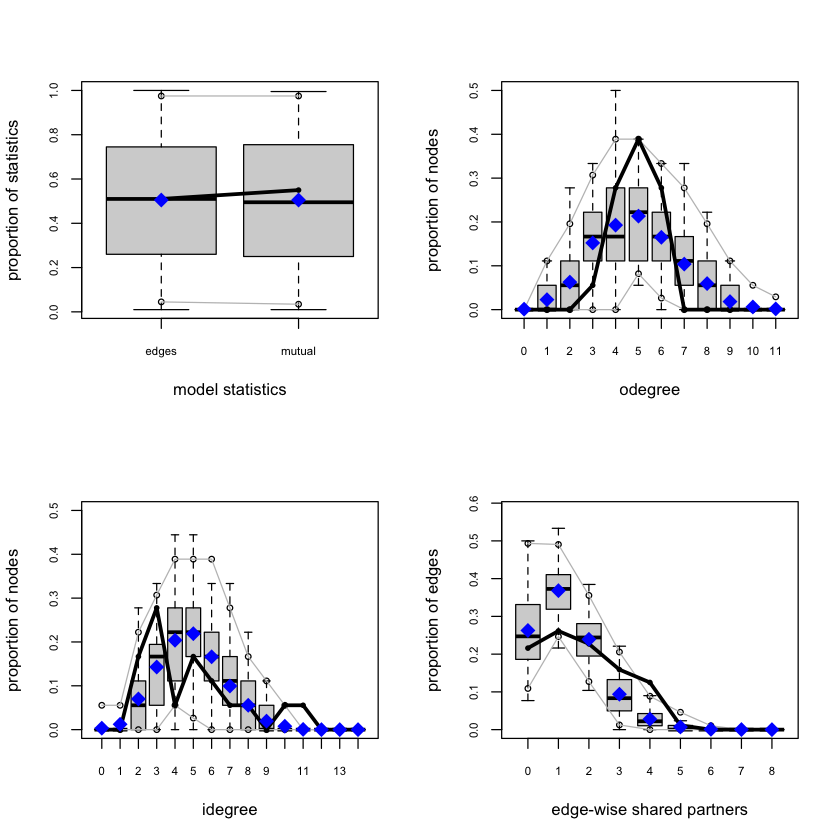

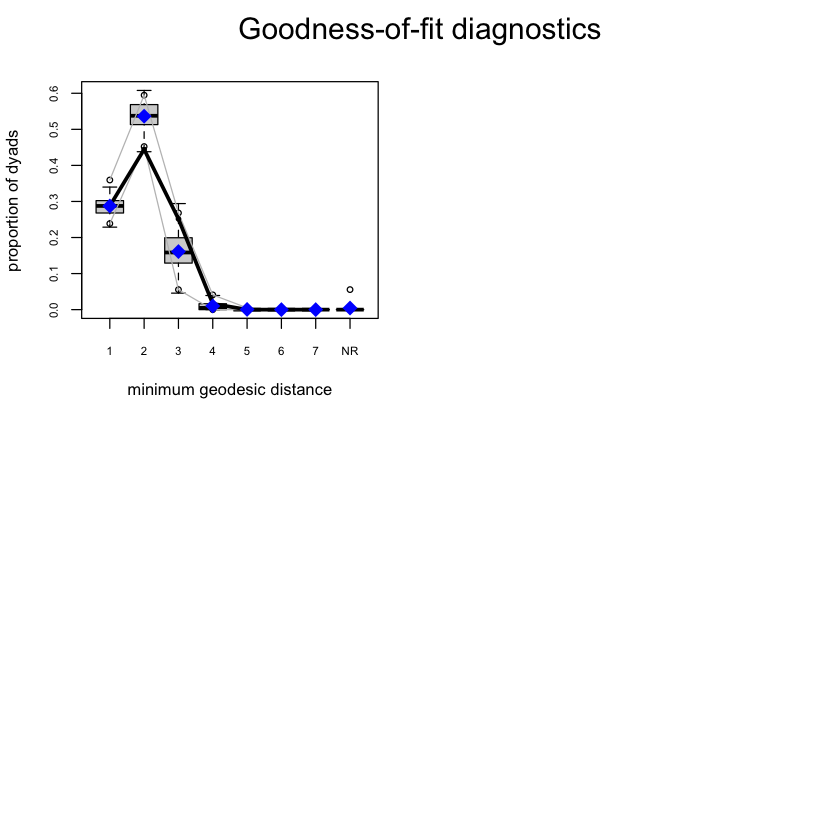

In [16]:
m1_gof2 = gof(m1)
par(mfrow = c(2, 2))
plot(m1_gof2)

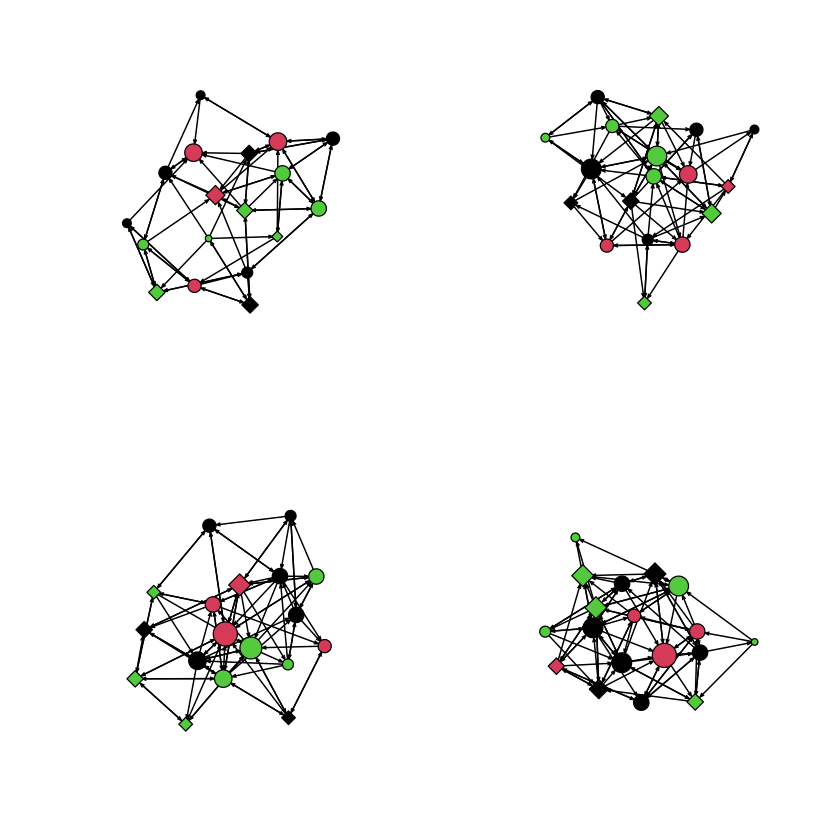

In [17]:
sim_nets = simulate(m2, nsim = 4)
# Define a plotting function:
plot_nets = function(n)
    plot(n
     , displaylabels = FALSE
     , vertex.cex = degree(n, cmode = 'indegree') / 2 + 1
     , vertex.col = 'group'
     , vertex.sides = ifelse(n %v% 'cloisterville', 4, 50)
     )
par(mfrow = c(2, 2))
invisible(lapply(sim_nets, plot_nets))  # I wrap that in `invsible()` because `plot.network` returns the coordinates of nodes in the plot, which can be useful for reproducability or programmatic manipulation, but is distracting here.


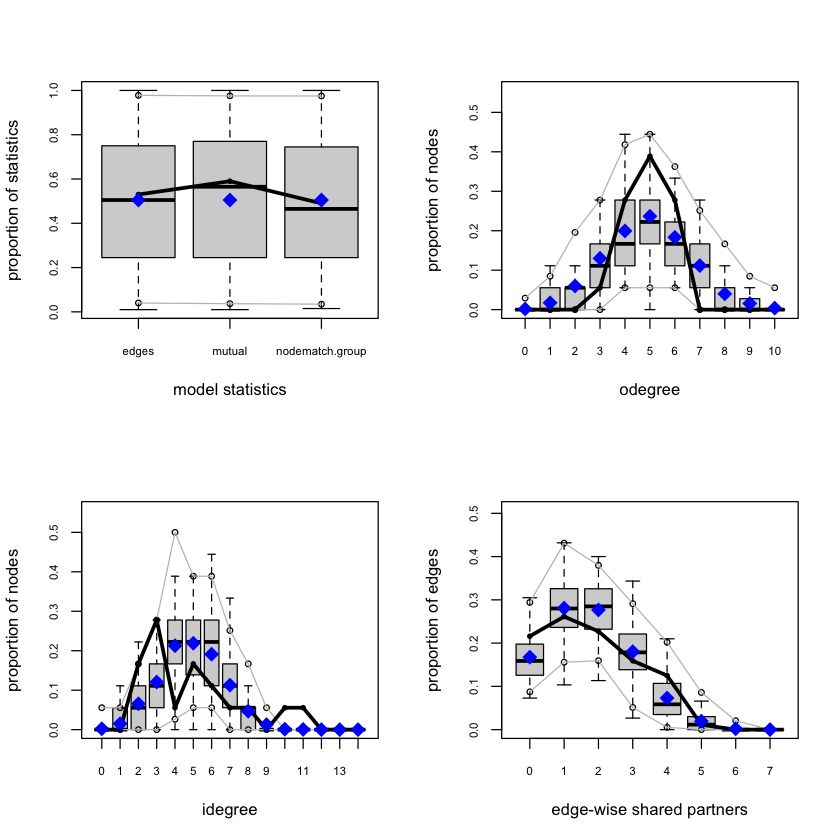

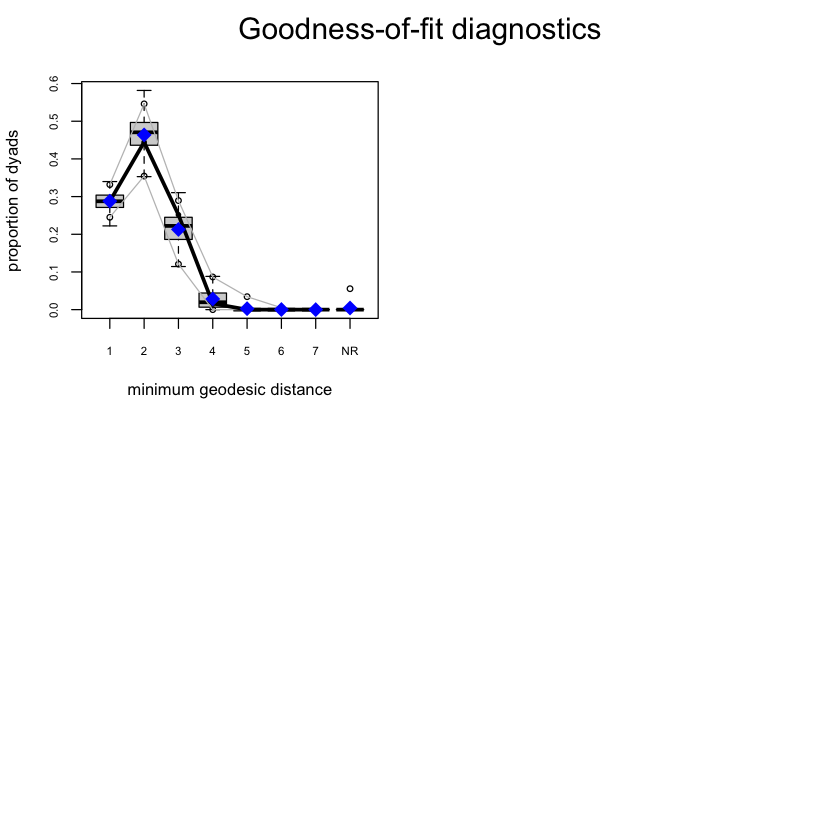

In [22]:
par(mfrow = c(2, 2))
invisible(plot(gof(m3)))

In [24]:
m4 = ergm(n ~ edges + mutual + nodematch('group') + istar(2))
summary(m4)


Starting maximum pseudolikelihood estimation (MPLE):

Evaluating the predictor and response matrix.

Maximizing the pseudolikelihood.

Finished MPLE.

Starting Monte Carlo maximum likelihood estimation (MCMLE):

Iteration 1 of at most 60:

Optimizing with step length 1.0000.

The log-likelihood improved by 0.6741.

Estimating equations are not within tolerance region.

Iteration 2 of at most 60:

Optimizing with step length 1.0000.

The log-likelihood improved by 0.2556.

Estimating equations are not within tolerance region.

Iteration 3 of at most 60:

Optimizing with step length 1.0000.

The log-likelihood improved by 0.0420.

Convergence test p-value: 0.4897. 
Not converged with 99% confidence; increasing sample size.

Iteration 4 of at most 60:

Optimizing with step length 1.0000.

The log-likelihood improved by 0.0349.

Convergence test p-value: 0.5617. 
Not converged with 99% confidence; increasing sample size.

Iteration 5 of at most 60:

Optimizing with step length 1.0000.

The

Call:
ergm(formula = n ~ edges + mutual + nodematch("group") + istar(2))

Monte Carlo Maximum Likelihood Results:

                Estimate Std. Error MCMC % z value Pr(>|z|)    
edges           -3.55150    0.39495      0  -8.992  < 1e-04 ***
mutual           1.42256    0.48992      0   2.904  0.00369 ** 
nodematch.group  2.27898    0.34795      0   6.550  < 1e-04 ***
istar2           0.24456    0.05512      0   4.437  < 1e-04 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

     Null Deviance: 424.2  on 306  degrees of freedom
 Residual Deviance: 257.5  on 302  degrees of freedom
 
AIC: 265.5  BIC: 280.4  (Smaller is better. MC Std. Err. = 0.2809)

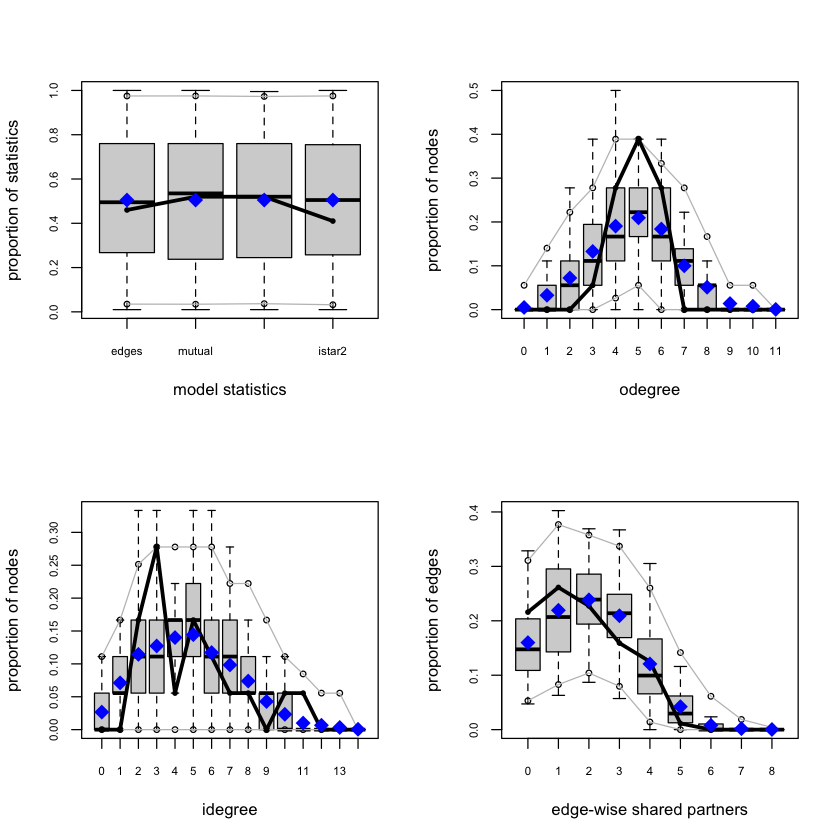

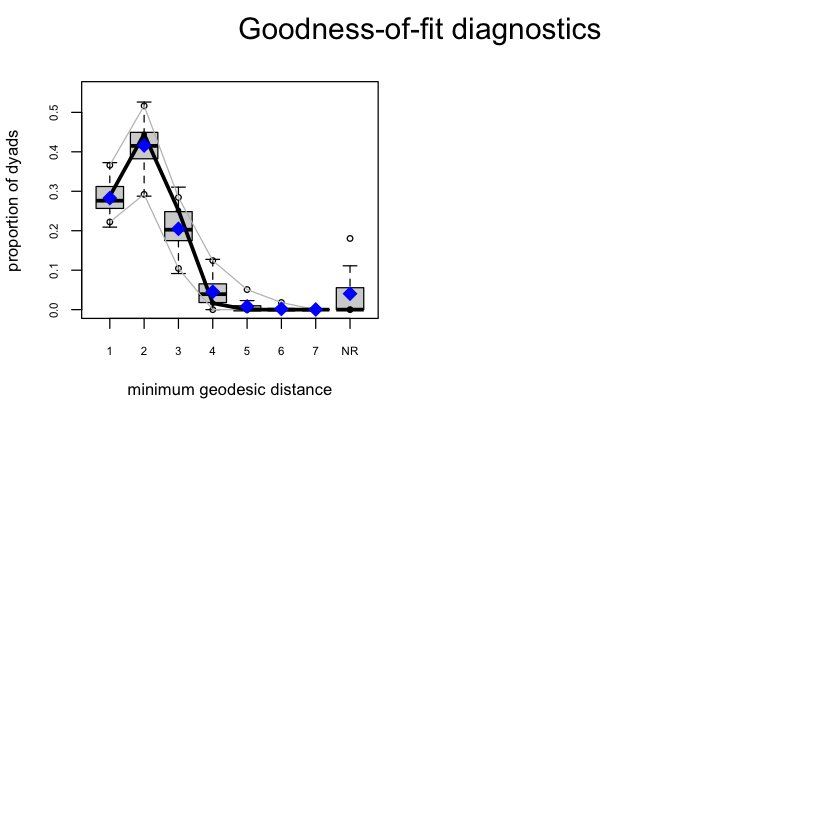

In [25]:
par(mfrow = c(2, 2))
invisible(plot(gof(m4)))

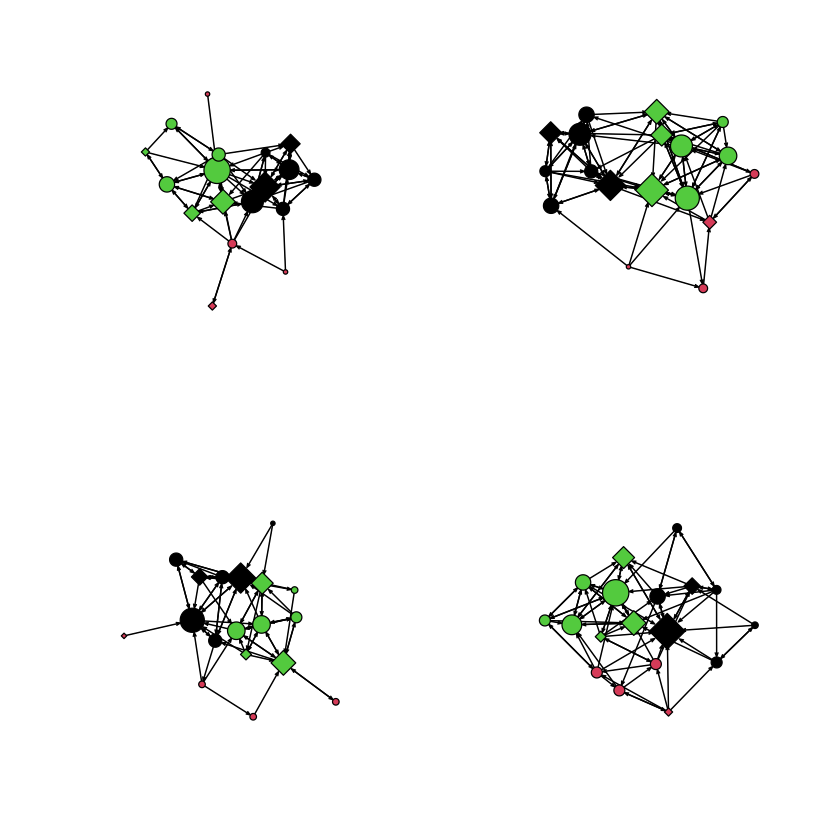

In [26]:
sim_nets = simulate(m4, nsim = 4)
par(mfrow = c(2, 2))
invisible(lapply(sim_nets, plot_nets))

In [27]:
round(sapply(list(m1, m2, m3, m4), AIC), 0)


[1] 369 336 274 266